In [1]:
# Standard Library
import warnings

# Data Manipulation
import pandas as pd

# Plotting and Visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning - Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

# Machine Learning - Model Selection
from sklearn.model_selection import train_test_split

# Machine Learning - Models
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Machine Learning - Metrics and Visualization
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import (
    ConfusionMatrixDisplay as cmd,
    accuracy_score,
    confusion_matrix as conf,
    f1_score,
    precision_score,
    recall_score,
    PrecisionRecallDisplay
)

warnings.filterwarnings('ignore')

## Read in and preview data

In [2]:
file_path = 'data/mountains_vs_beaches_preferences.csv'
df = pd.read_csv(file_path)

In [3]:
df.head() # overview of the data

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


In [4]:
df.info() # information on data types and possible null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


In [5]:
df.shape # number of rows and cols

(52444, 14)

In [6]:
df.describe() # summary statistics on features

,Age,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Preference
count,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000
mean,43.507360,70017.271280,4.489265,2741.799062,149.943502,149.888452,0.500858,0.498436,0.250706
std,14.985597,28847.560428,2.876130,1296.922423,86.548644,86.469248,0.500004,0.500002,0.433423
min,18.000000,20001.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,45048.250000,2.000000,1622.000000,75.000000,75.750000,0.000000,0.000000,0.000000
50%,43.000000,70167.000000,4.000000,2733.000000,150.000000,150.000000,1.000000,0.000000,0.000000
75%,56.000000,95108.500000,7.000000,3869.000000,225.000000,225.000000,1.000000,1.000000,1.000000
max,69.000000,119999.000000,9.000000,4999.000000,299.000000,299.000000,1.000000,1.000000,1.000000


There is a binary target variable and 13 explanatory, five categorical and eight numeric, variables. The mean value of the target variable 'Preferences' is 0.25, meaning that around a quarter of its values are 0 and three fourths are 1. 

## Create dummy variables of object type data

### Encoding nominal data and ordinal data separately

In [7]:
ohe = OneHotEncoder(drop='first', sparse=False) # Setting up encoder and dropping first to remove multicollinearity

In [8]:
education_order = ['high school', 'bachelor', 'master', 'doctorate']
location_order = ['rural', 'suburban', 'urban']

In [9]:
ct = ColumnTransformer(transformers=[
                            ('Nominal', ohe, ['Gender', 'Preferred_Activities', 'Favorite_Season']),
                            ('ordinal', OrdinalEncoder(categories=[education_order, location_order]), ['Education_Level', 'Location'])],
                            remainder='passthrough')

In [10]:
ct #column transformer overview

ColumnTransformer(remainder='passthrough',
                  transformers=[('Nominal',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['Gender', 'Preferred_Activities',
                                  'Favorite_Season']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['high school',
                                                             'bachelor',
                                                             'master',
                                                             'doctorate'],
                                                            ['rural',
                                                             'suburban',
                                                             'urban']]),
                                 ['Education_Level', 'Location'])])

In [11]:
transformed_data = ct.fit_transform(df)
feature_names = ct.get_feature_names_out()


In [12]:
transformed_df = pd.DataFrame(transformed_data, columns=feature_names)
transformed_df.head()

,Nominal__Gender_male,Nominal__Gender_non-binary,Nominal__Preferred_Activities_skiing,Nominal__Preferred_Activities_sunbathing,Nominal__Preferred_Activities_swimming,Nominal__Favorite_Season_spring,Nominal__Favorite_Season_summer,Nominal__Favorite_Season_winter,ordinal__Education_Level,ordinal__Location,remainder__Age,remainder__Income,remainder__Travel_Frequency,remainder__Vacation_Budget,remainder__Proximity_to_Mountains,remainder__Proximity_to_Beaches,remainder__Pets,remainder__Environmental_Concerns,remainder__Preference
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,56.0,71477.0,9.0,2477.0,175.0,267.0,0.0,1.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,69.0,88740.0,1.0,4777.0,228.0,190.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,46.0,46562.0,0.0,1469.0,71.0,280.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,32.0,99044.0,6.0,1482.0,31.0,255.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,60.0,106583.0,5.0,516.0,23.0,151.0,1.0,1.0,0.0


The transformed dataset contains dummy variables from the nominal data, ordered data from the ordinal data columns and the original data from numeric columns.
For example for gender two columns are created from male and non-binary and the third female category is implied.
Further for Preferred Activities, dummy columns are created for skiing, sunbathing and swimming while hiking is implied if all the aforementioned are zero.
Lastly, as example proximity to mountains and budget are retained as is as they contain numeric data.

This approach results in a systematic and consistent way of handling string type data.

## Create visualization of data

We will visualize the explanatory data using bar plots and distribution plots for categorical and numeric data respectively. The target column is vizualised using pie chart.

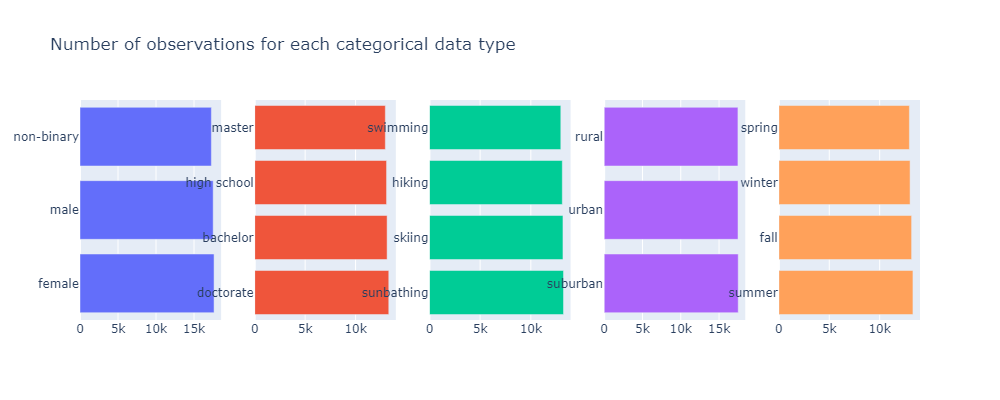

In [13]:
object_cols = df.select_dtypes(include=['object']).columns

# Create a subplot figure with 1 row and 5 columns
fig = make_subplots(rows=1, cols=len(object_cols), shared_yaxes=False)

# Iterate through each object column and add a horizontal bar plot to the subplot
for i, col in enumerate(object_cols, start=1):
    value_counts = df[col].value_counts()
    fig.add_trace(
        go.Bar(
            x=value_counts.values,
            y=value_counts.index,
            orientation='h',  # Horizontal bar chart
            name=col
        ),
        row=1, col=i
    )

fig.update_layout(
    height=400,  # Fixed height for all subplots
    width=200 * len(object_cols),  # Adjust width based on number of plots
    title_text="Number of observations for each categorical data type",
    showlegend=False
)

fig.show("png")


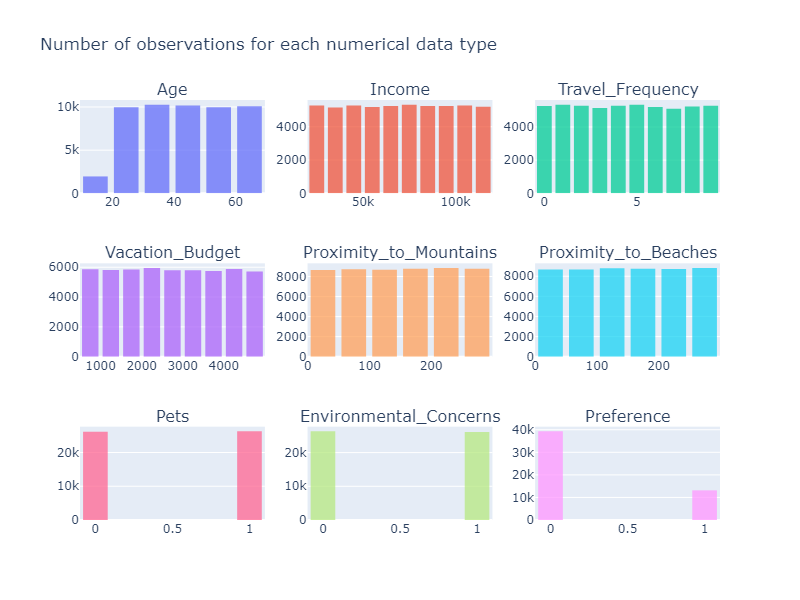

In [14]:
num_cols = df.select_dtypes(include=['number']).columns

# Create a subplot figure with 5 rows and 1 column
fig = make_subplots(rows=3, cols=3, shared_yaxes=False, subplot_titles=[col for col in num_cols])

# Iterate through each numeric column and add a histogram plot to the subplot
for idx, col in enumerate(num_cols):
    row = (idx // 3) + 1
    col_pos = (idx % 3) + 1
    
    # Create histogram and KDE trace
    hist = go.Histogram(x=df[col], nbinsx=10, name=col, opacity=0.75)
    kde = go.Scatter(
        x=df[col].sort_values(),
        y=df[col].value_counts(normalize=True).sort_index().cumsum(),
        name=f'{col}',
        mode='lines'
    )
    fig.add_trace(hist, row=row, col=col_pos)

fig.update_layout(
    height=600, width=800,
    title_text="Number of observations for each numerical data type",
    showlegend=False,
    bargap=0.2
)

fig.show("png")


## Setting up models

In [15]:
# setting up explanatory and target variables and train and test data
X = transformed_df.iloc[:,:-1]
y = transformed_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:

names = [
    "Linear SVM",
    "RBF SVM",
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGB"
]

classifiers = [
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(max_depth=10, random_state=42),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(random_state=42)
]


We set up a range of classification models to determine what model best predicts the vacation preference.

In [18]:
model = []
accy = []
prec = []
rec = []
f_score = []
conf_matrix = []

# Loop through models and compute metrics
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="binary")
    recall = recall_score(y_test, y_pred, average="binary")
    f1 = f1_score(y_test, y_pred, average="binary")
    cm = conf(y_test, y_pred)

    model.append(name)
    accy.append(accuracy)
    prec.append(precision)
    rec.append(recall)
    f_score.append(f1)
    print(f'{name} model done!')

results_dict = {'name': model,
               'accuracy': accy,
               'precision': prec,
               'recall': rec,
               'f1-score': f_score}
results_df = pd.DataFrame(results_dict)

print(results_df)

Linear SVM model done!
RBF SVM model done!
Logistic Regression model done!
Decision Tree model done!
Random Forest model done!
Neural Net model done!
AdaBoost model done!
Naive Bayes model done!
QDA model done!
XGB model done!
                  name  accuracy  precision    recall  f1-score
0           Linear SVM  0.776432   0.591405  0.350570  0.440201
1              RBF SVM  0.749261   0.000000  0.000000  0.000000
2  Logistic Regression  0.745066   0.487696  0.331559  0.394749
3        Decision Tree  0.995900   0.991638  0.992015  0.991827
4        Random Forest  0.990943   0.995311  0.968441  0.981692
5           Neural Net  0.787778   0.647230  0.337643  0.443778
6             AdaBoost  0.961388   0.938165  0.905703  0.921648
7          Naive Bayes  0.804462   0.651809  0.472624  0.547939
8                  QDA  0.749928   0.705882  0.004563  0.009067
9                  XGB  0.995424   0.993879  0.987833  0.990847


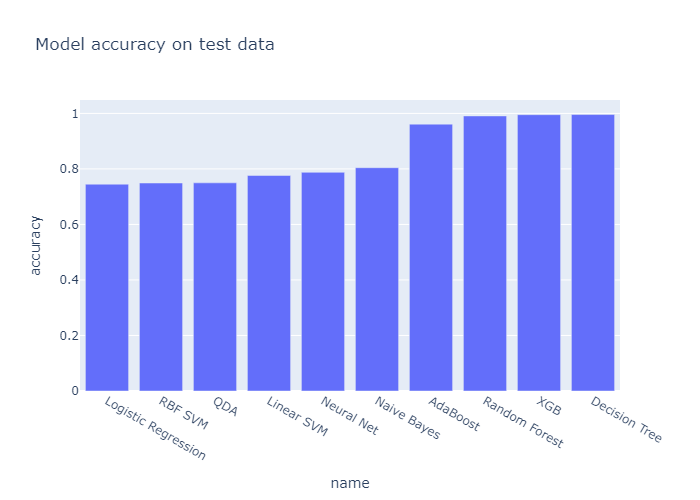

In [19]:
fig = px.bar(results_df.sort_values('accuracy'), x='name', y='accuracy', title='Model accuracy on test data')
fig.show("png")


The models show a large variety in predictive capability on the test data. Best performing are decision tree, random forest and XG boost classification models with an accuracy around 99 per cent while logistic regression and SVM perform the worst.

Since our target variable is imbalanced, it is particularly relevant to look at the precision and recall of the models:
- Precision: The proportion of true positive predictions out of all positive predictions made by the model. High precision (but possibly low recall) means the model is being very careful about predicting the disease, but it misses some actual cases.
- Recall: The proportion of true positive predictions out of all actual positive cases. High recall (but possibly low precision) means the model is identifying most of the disease cases but is also making many false positives.

The Precision-Recall (PR) curve is a representation used to evaluate the performance of classification models, particularly when the classes are imbalanced (i.e., one class is much more frequent than the other). It shows the trade-off between precision and recall at various threshold settings of the classifier. 

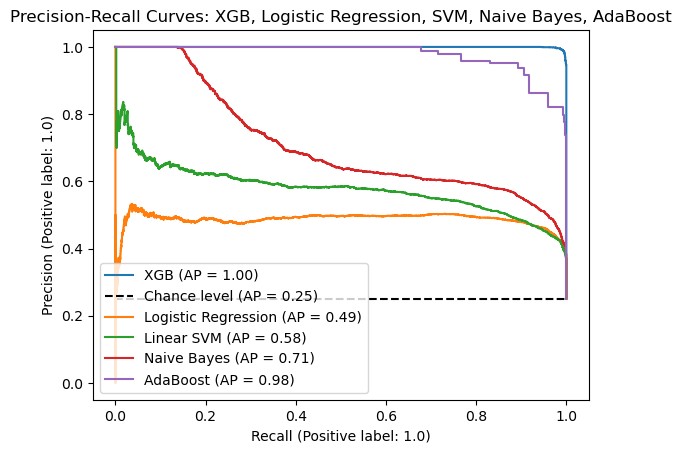

In [20]:
xgb = GradientBoostingClassifier(random_state=42)
log_reg = LogisticRegression(random_state=42)
svm = SVC(kernel="linear", C=0.025, random_state=42)
nb = GaussianNB()
adaboost = AdaBoostClassifier(algorithm="SAMME", random_state=42)

# Fit all models
models = [xgb, log_reg, svm, nb, adaboost]
for model in models:
    model.fit(X_train, y_train)

# Create initial display for XGB
display_xgb = PrecisionRecallDisplay.from_estimator(
    xgb, X_test, y_test, name="XGB", plot_chance_level=True
)

display_log_reg = PrecisionRecallDisplay.from_estimator(
    log_reg, X_test, y_test, name="Logistic Regression", ax=display_xgb.ax_
)# Add Logistic Regression

display_svm = PrecisionRecallDisplay.from_estimator(
    svm, X_test, y_test, name="Linear SVM", ax=display_xgb.ax_
)# Add SVM

display_nb = PrecisionRecallDisplay.from_estimator(
    nb, X_test, y_test, name="Naive Bayes", ax=display_xgb.ax_
)# Add Naive Bayes

display_adaboost = PrecisionRecallDisplay.from_estimator(
    adaboost, X_test, y_test, name="AdaBoost", ax=display_xgb.ax_
)# Add AdaBoost

# Set title for combined plot
_ = display_xgb.ax_.set_title("Precision-Recall Curves: XGB, Logistic Regression, SVM, Naive Bayes, AdaBoost")


The Precision-Recall curves show that XG boost model performs the best with a precision-recall score for various thresholds settings. Thus the model is returning accurate results (high precision), as well as returning a majority of all relevant results (high recall).

